## Constants

In [5]:
import os

FILE_COUNT = 1000
PLAYLISTS_PER_FILE = 1000

DIR_DATA_RAW = os.path.join("..", "data", "raw")
DIR_DATA_PROCESSED = os.path.join("..", "data", "processed")

PLAYLIST_COUNT = FILE_COUNT * PLAYLISTS_PER_FILE

In [6]:
import pickle
import matplotlib.pyplot as plt

PLAYLISTS_METRICS_PATH = os.path.join(DIR_DATA_PROCESSED, "playlists_metrics" + str(PLAYLIST_COUNT) + ".pkl")

def plot_trends(groupby_feature, trend_feature, ax, composite_groupby_input = False, rolling_period = 1, max_value = -1, plot_legend = True):

    with open(PLAYLISTS_METRICS_PATH, "rb") as fin:
        playlists_metrics = pickle.load(fin)

    if composite_groupby_input:
        groupby_tuple = groupby_feature
    else:
        groupby_tuple = ('metadata', groupby_feature)
    trend = playlists_metrics.groupby(groupby_tuple)[trend_feature].mean()

    if max_value != -1:
        trend = trend[trend.index <= max_value]

    trend_comparative = trend[[(trend_feature, "max"), (trend_feature, "q3"), (trend_feature, "mean"), (trend_feature, "median"), (trend_feature, "q1"), (trend_feature, "min")]].rolling(rolling_period).mean()
    trend_variance = trend[[(trend_feature, "standard deviation")]].rolling(rolling_period).mean()

    ax.plot(trend_comparative, label = trend_comparative.columns.get_level_values(1))
    ax.plot(trend_variance, '--', label = trend_variance.columns.get_level_values(1)[0])
    ax.set_xlabel(groupby_feature)
    ax.set_ylabel(trend_feature)
    ax.set_title(f"'{trend_feature}' Dependency on '{groupby_feature}' Feature in a Playlist")
    if plot_legend:
        ax.legend(loc = 'best')


In [7]:
import matplotlib.pyplot as plt

def plot_dependency_table(groupby_feature, composite_groupby_input = False, rolling_period = 1, max_value = -1):
    FEATURES = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature"]

    num_rows = 4
    num_columns = 3
    fig, ax = plt.subplots(num_rows, num_columns, figsize = (30, 18))
    for i in range(num_rows):
        for j in range(num_columns):
            plot_trends(groupby_feature, FEATURES[i * num_columns + j], ax[i, j], composite_groupby_input, rolling_period, max_value, plot_legend = False)

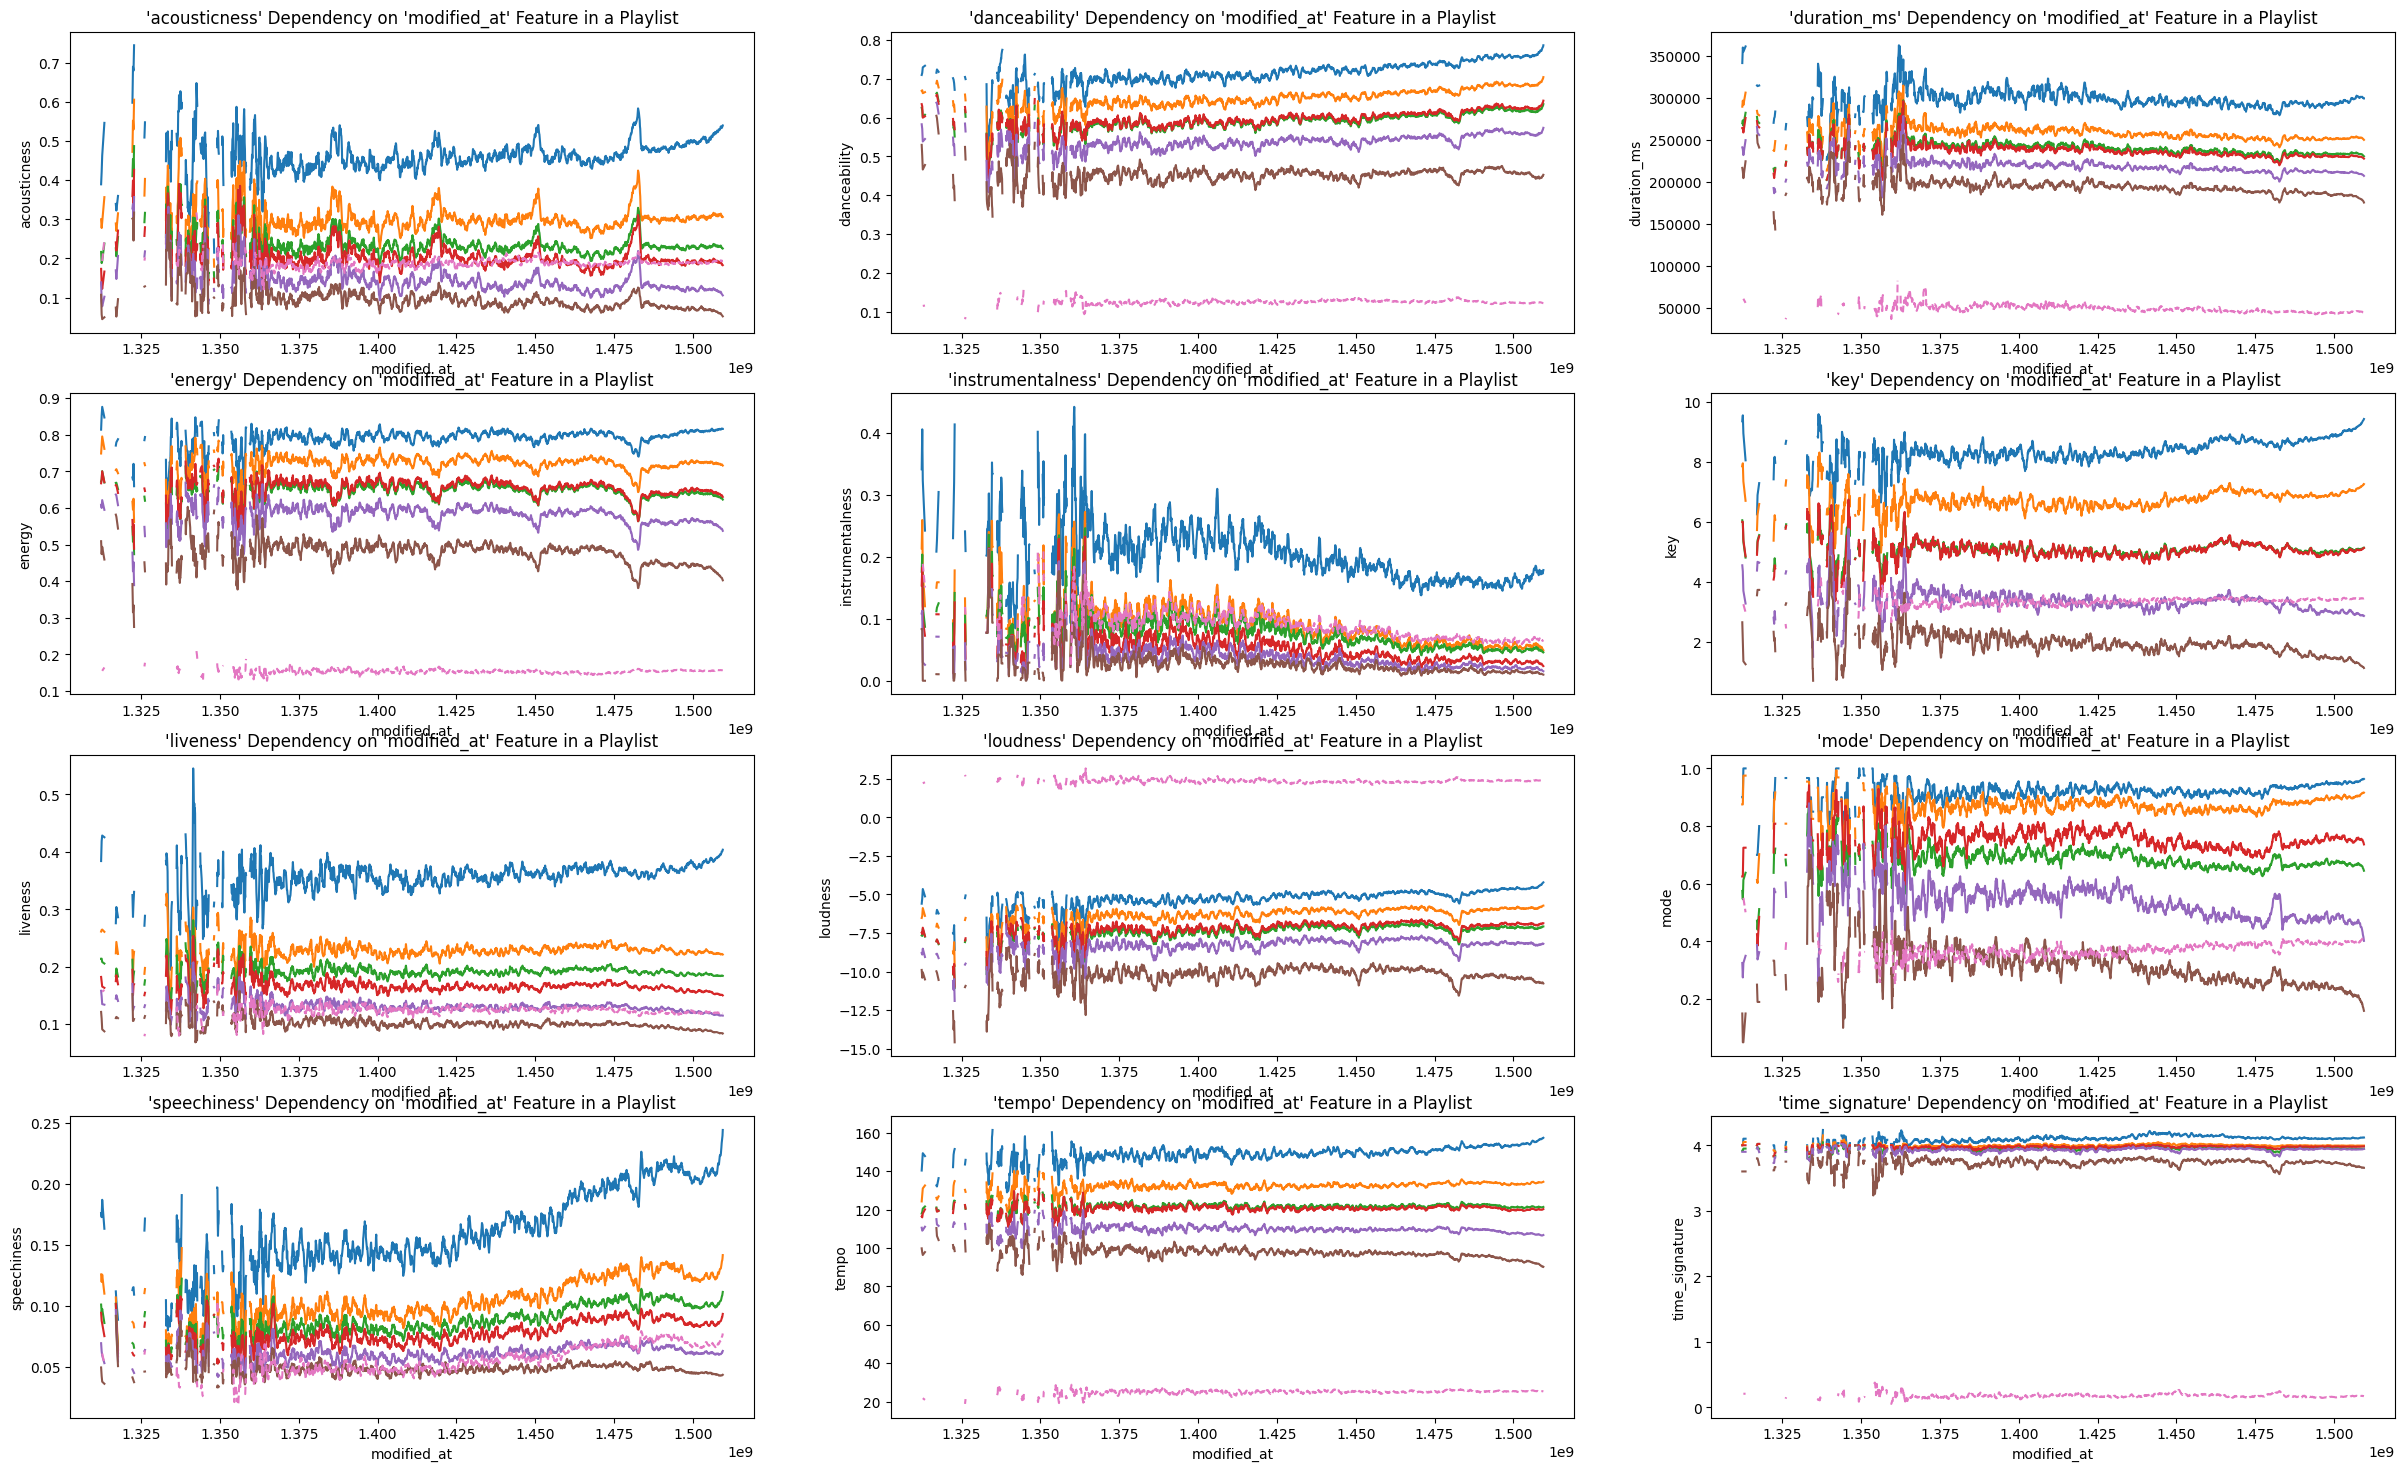

In [8]:
plot_dependency_table("modified_at", rolling_period = 10)

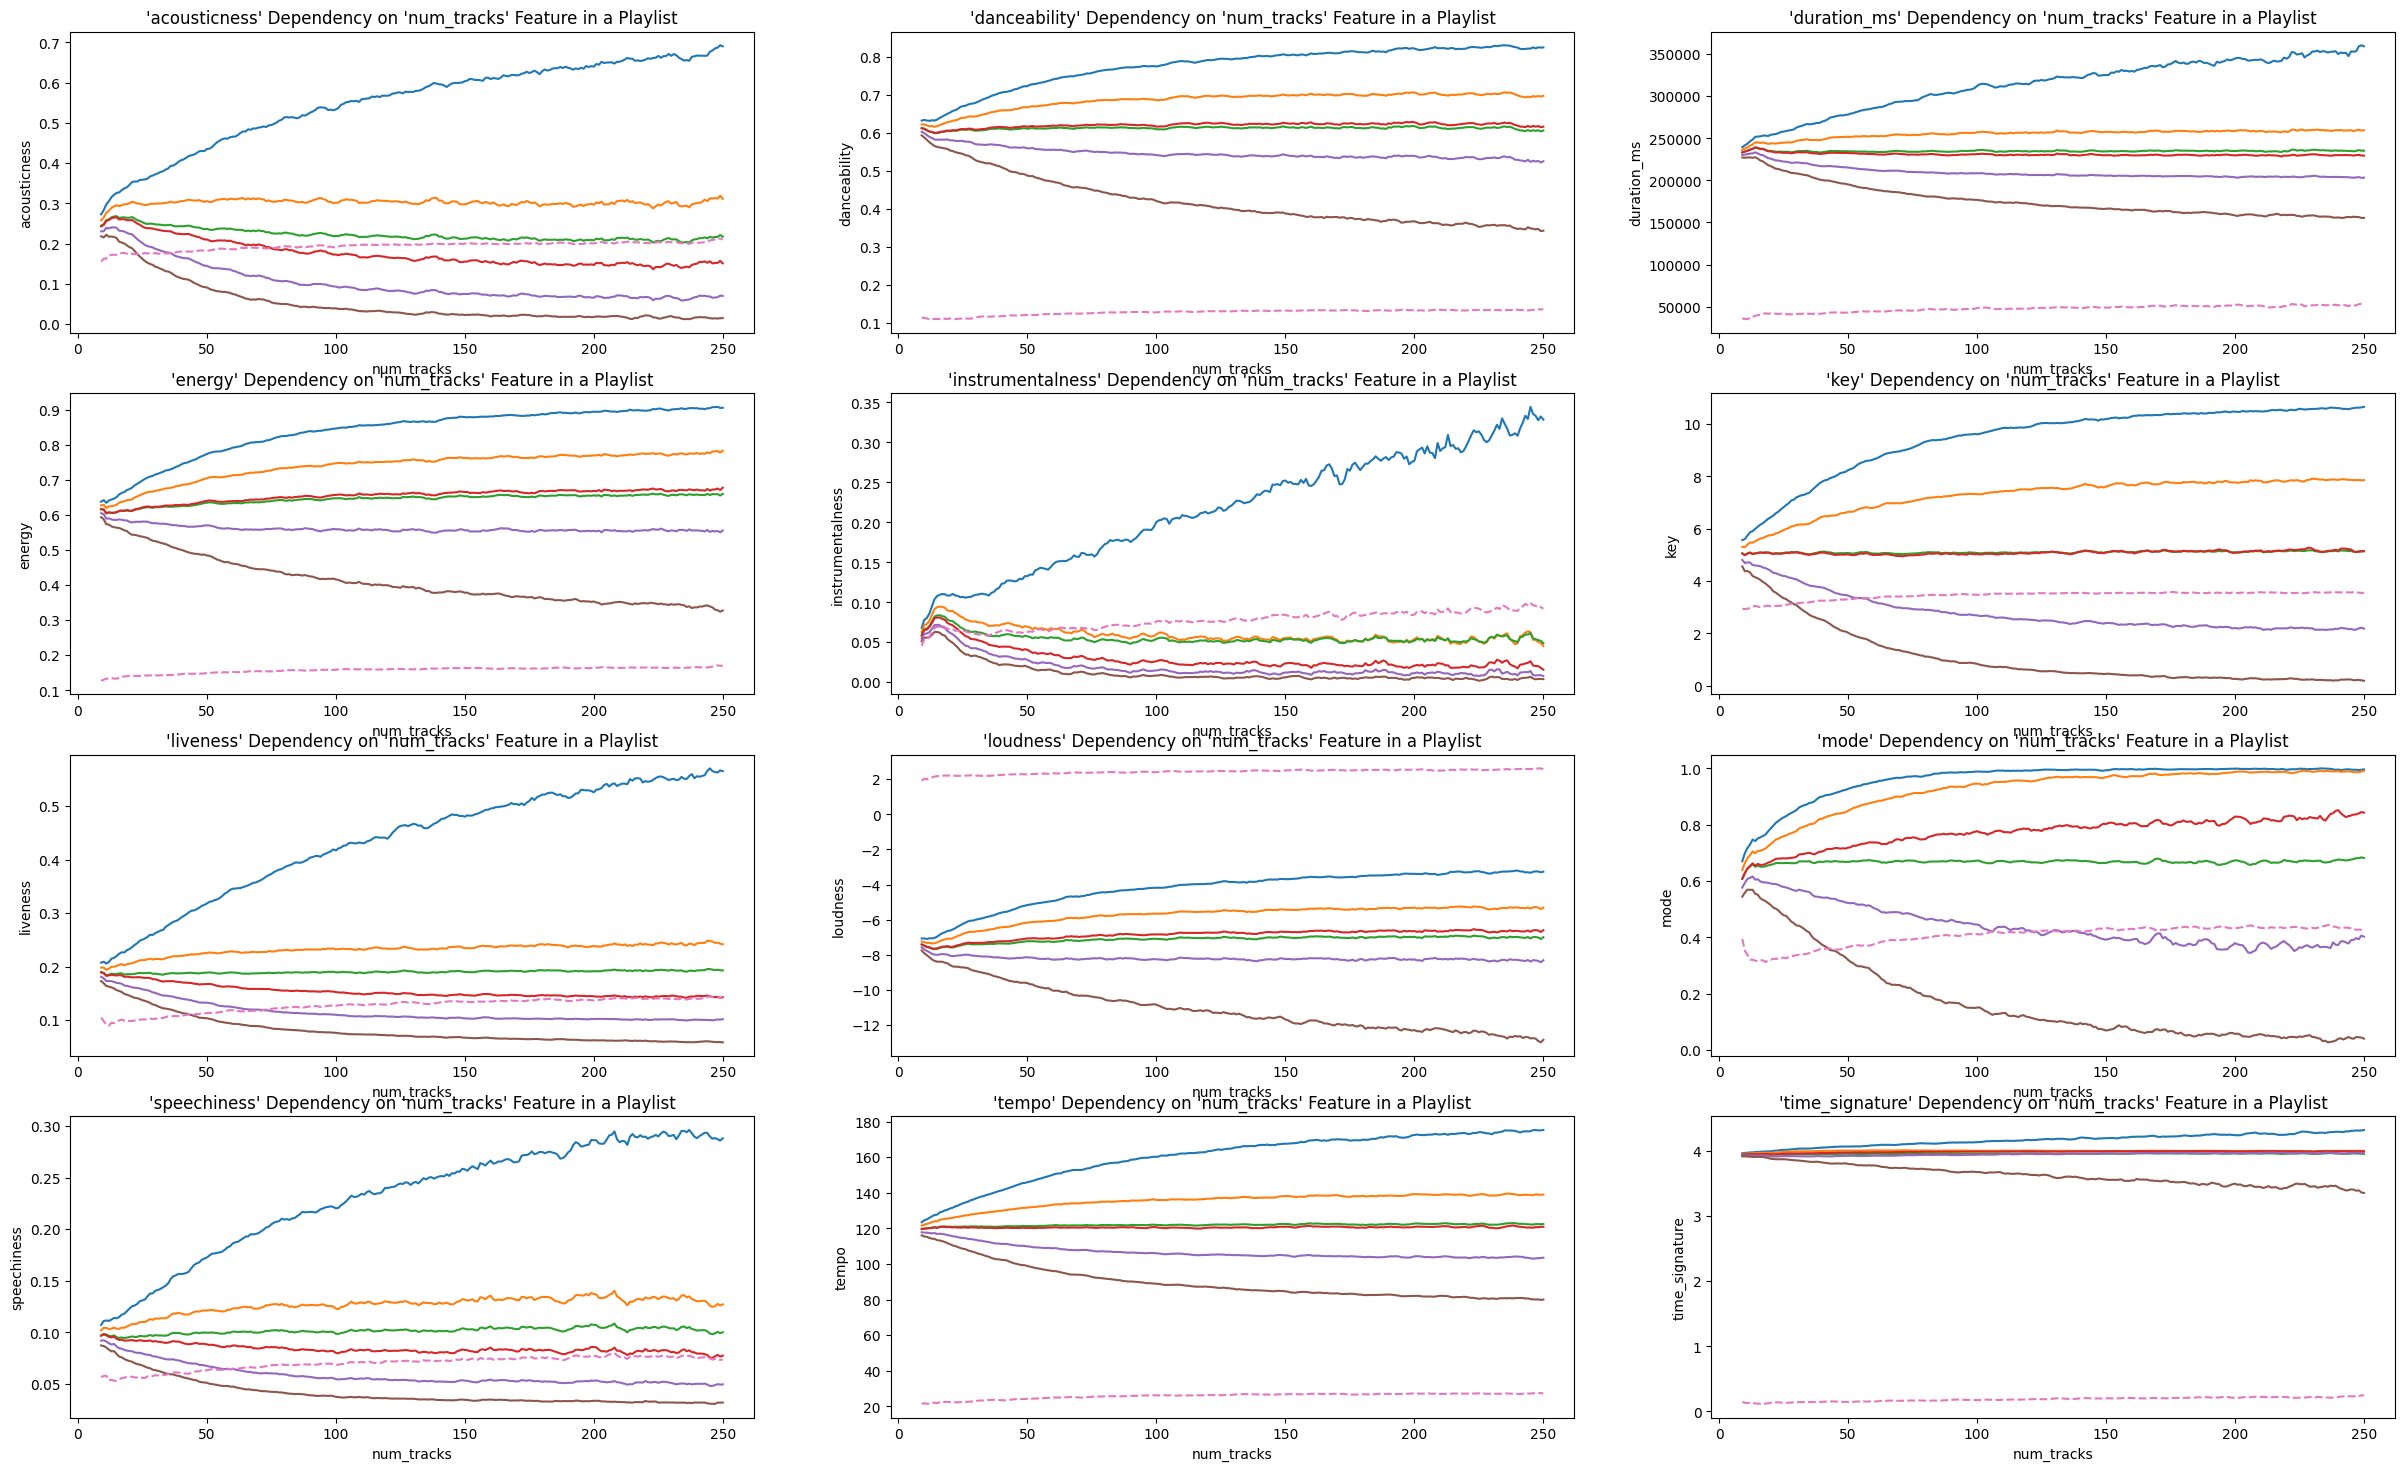

In [9]:
plot_dependency_table("num_tracks", rolling_period = 5)

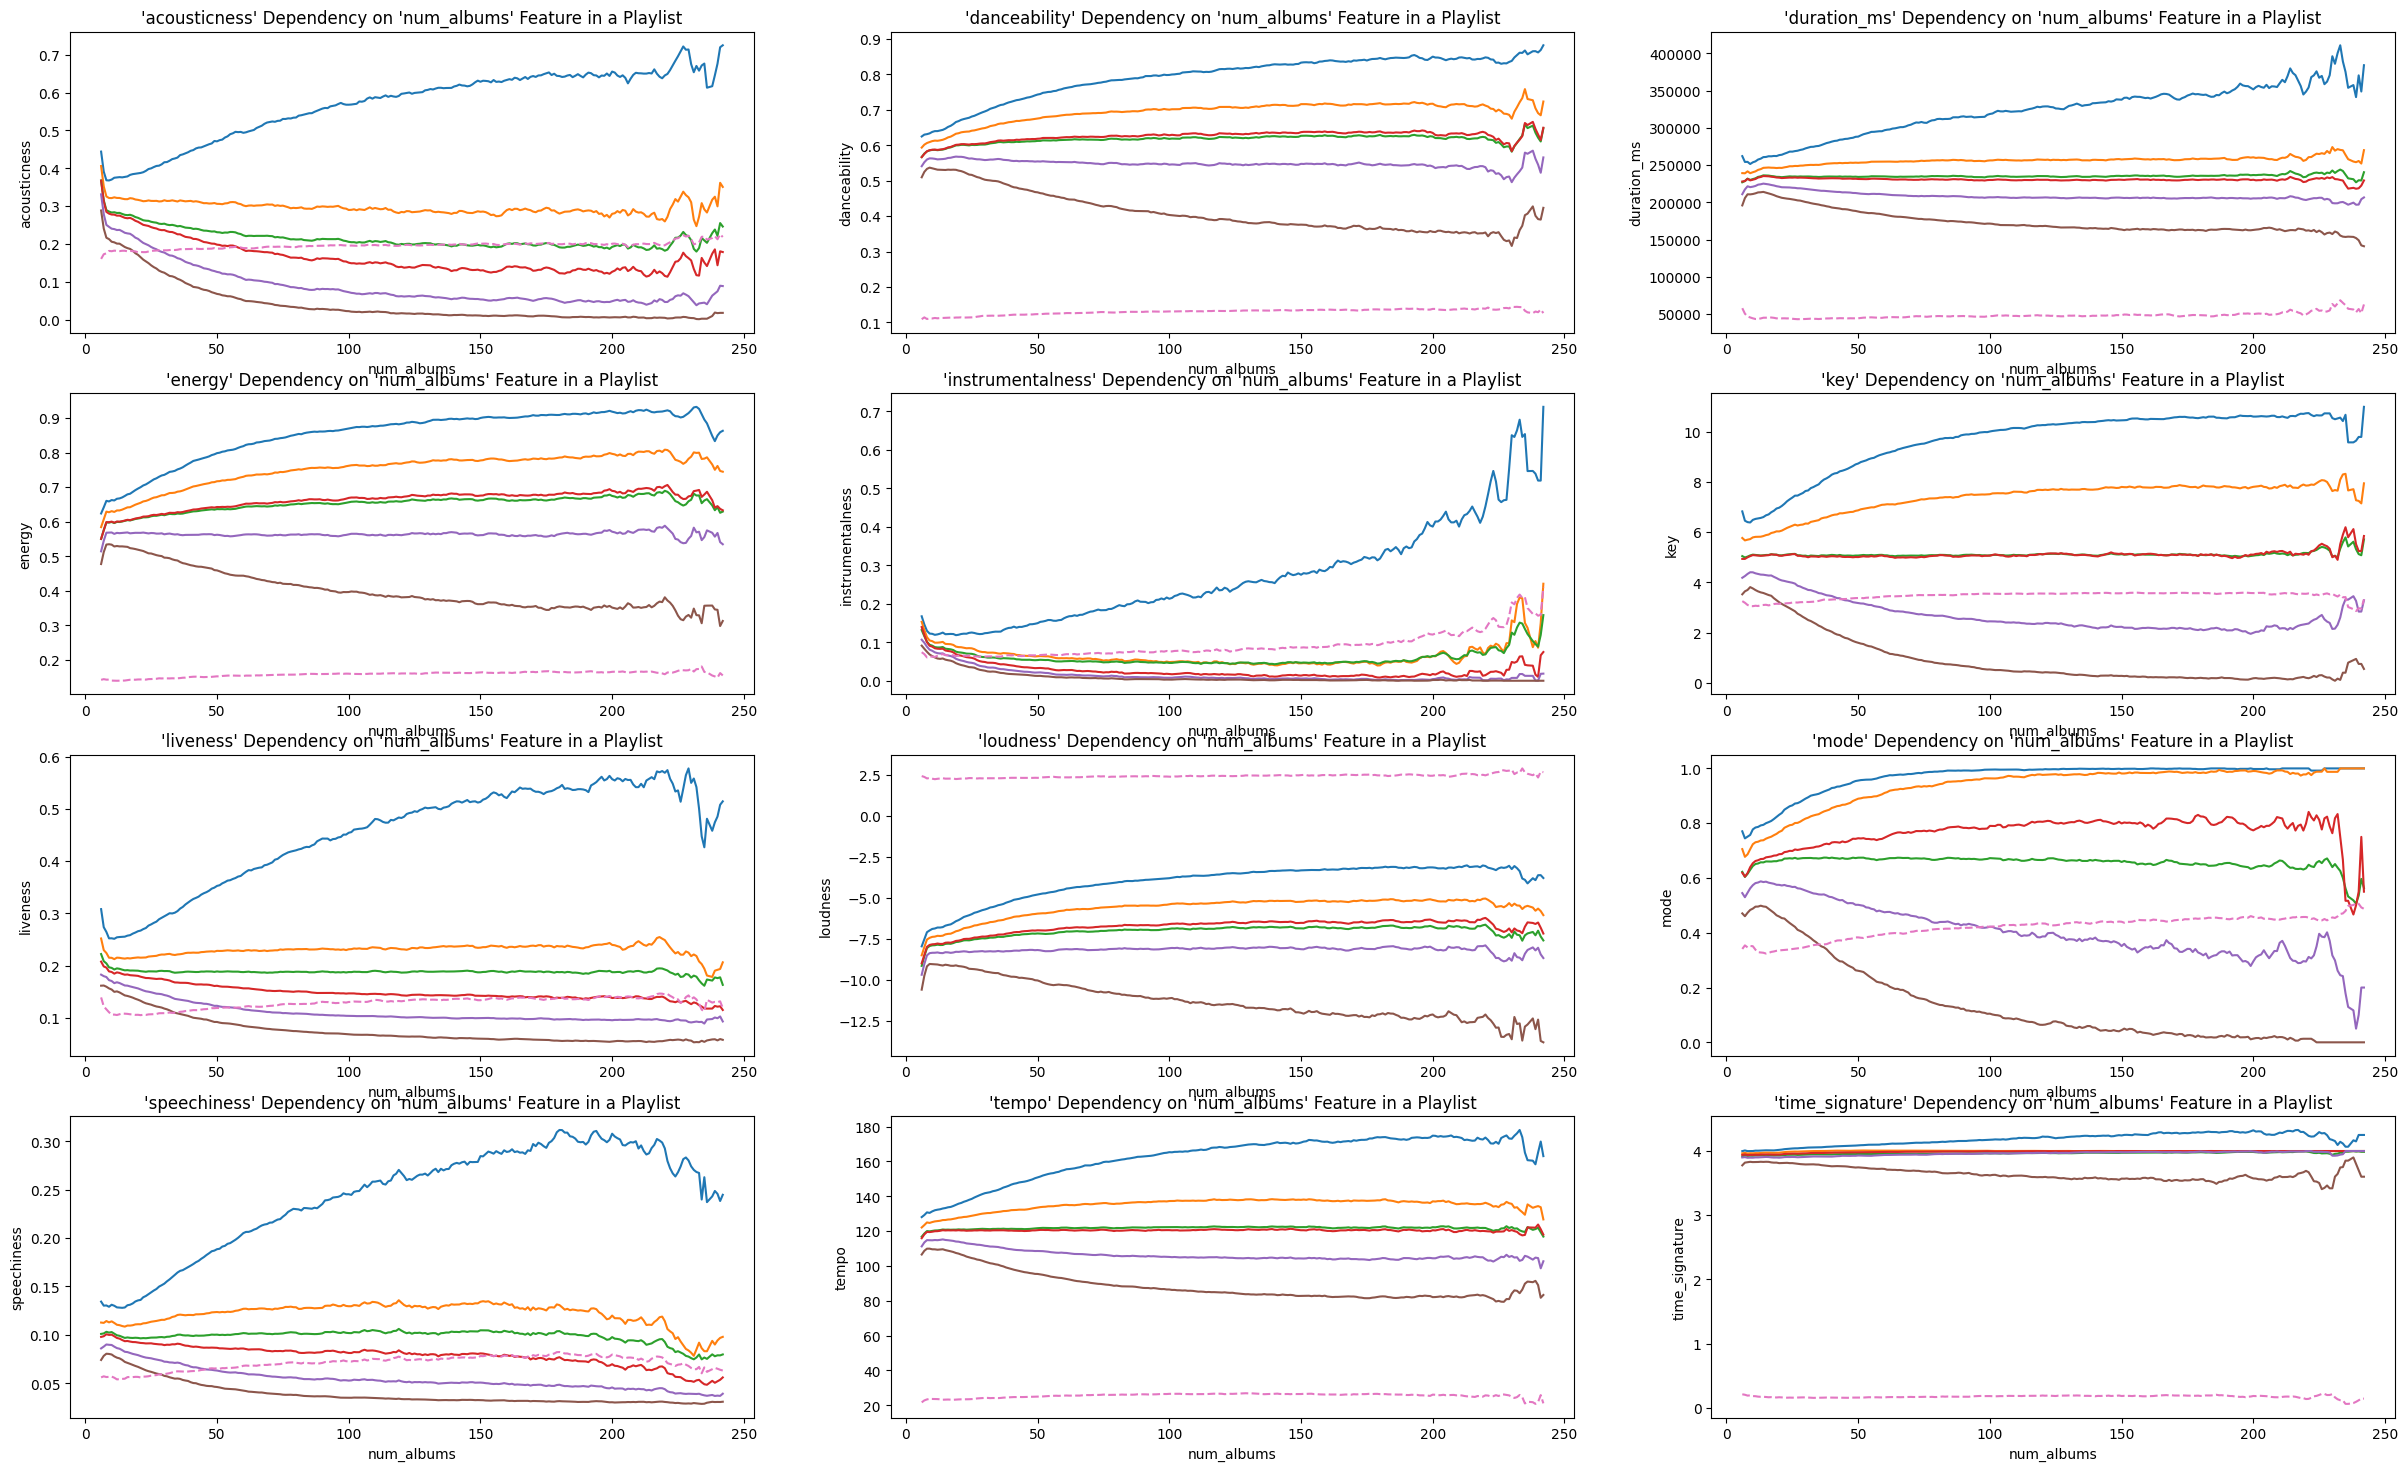

In [10]:
plot_dependency_table("num_albums", rolling_period = 5)

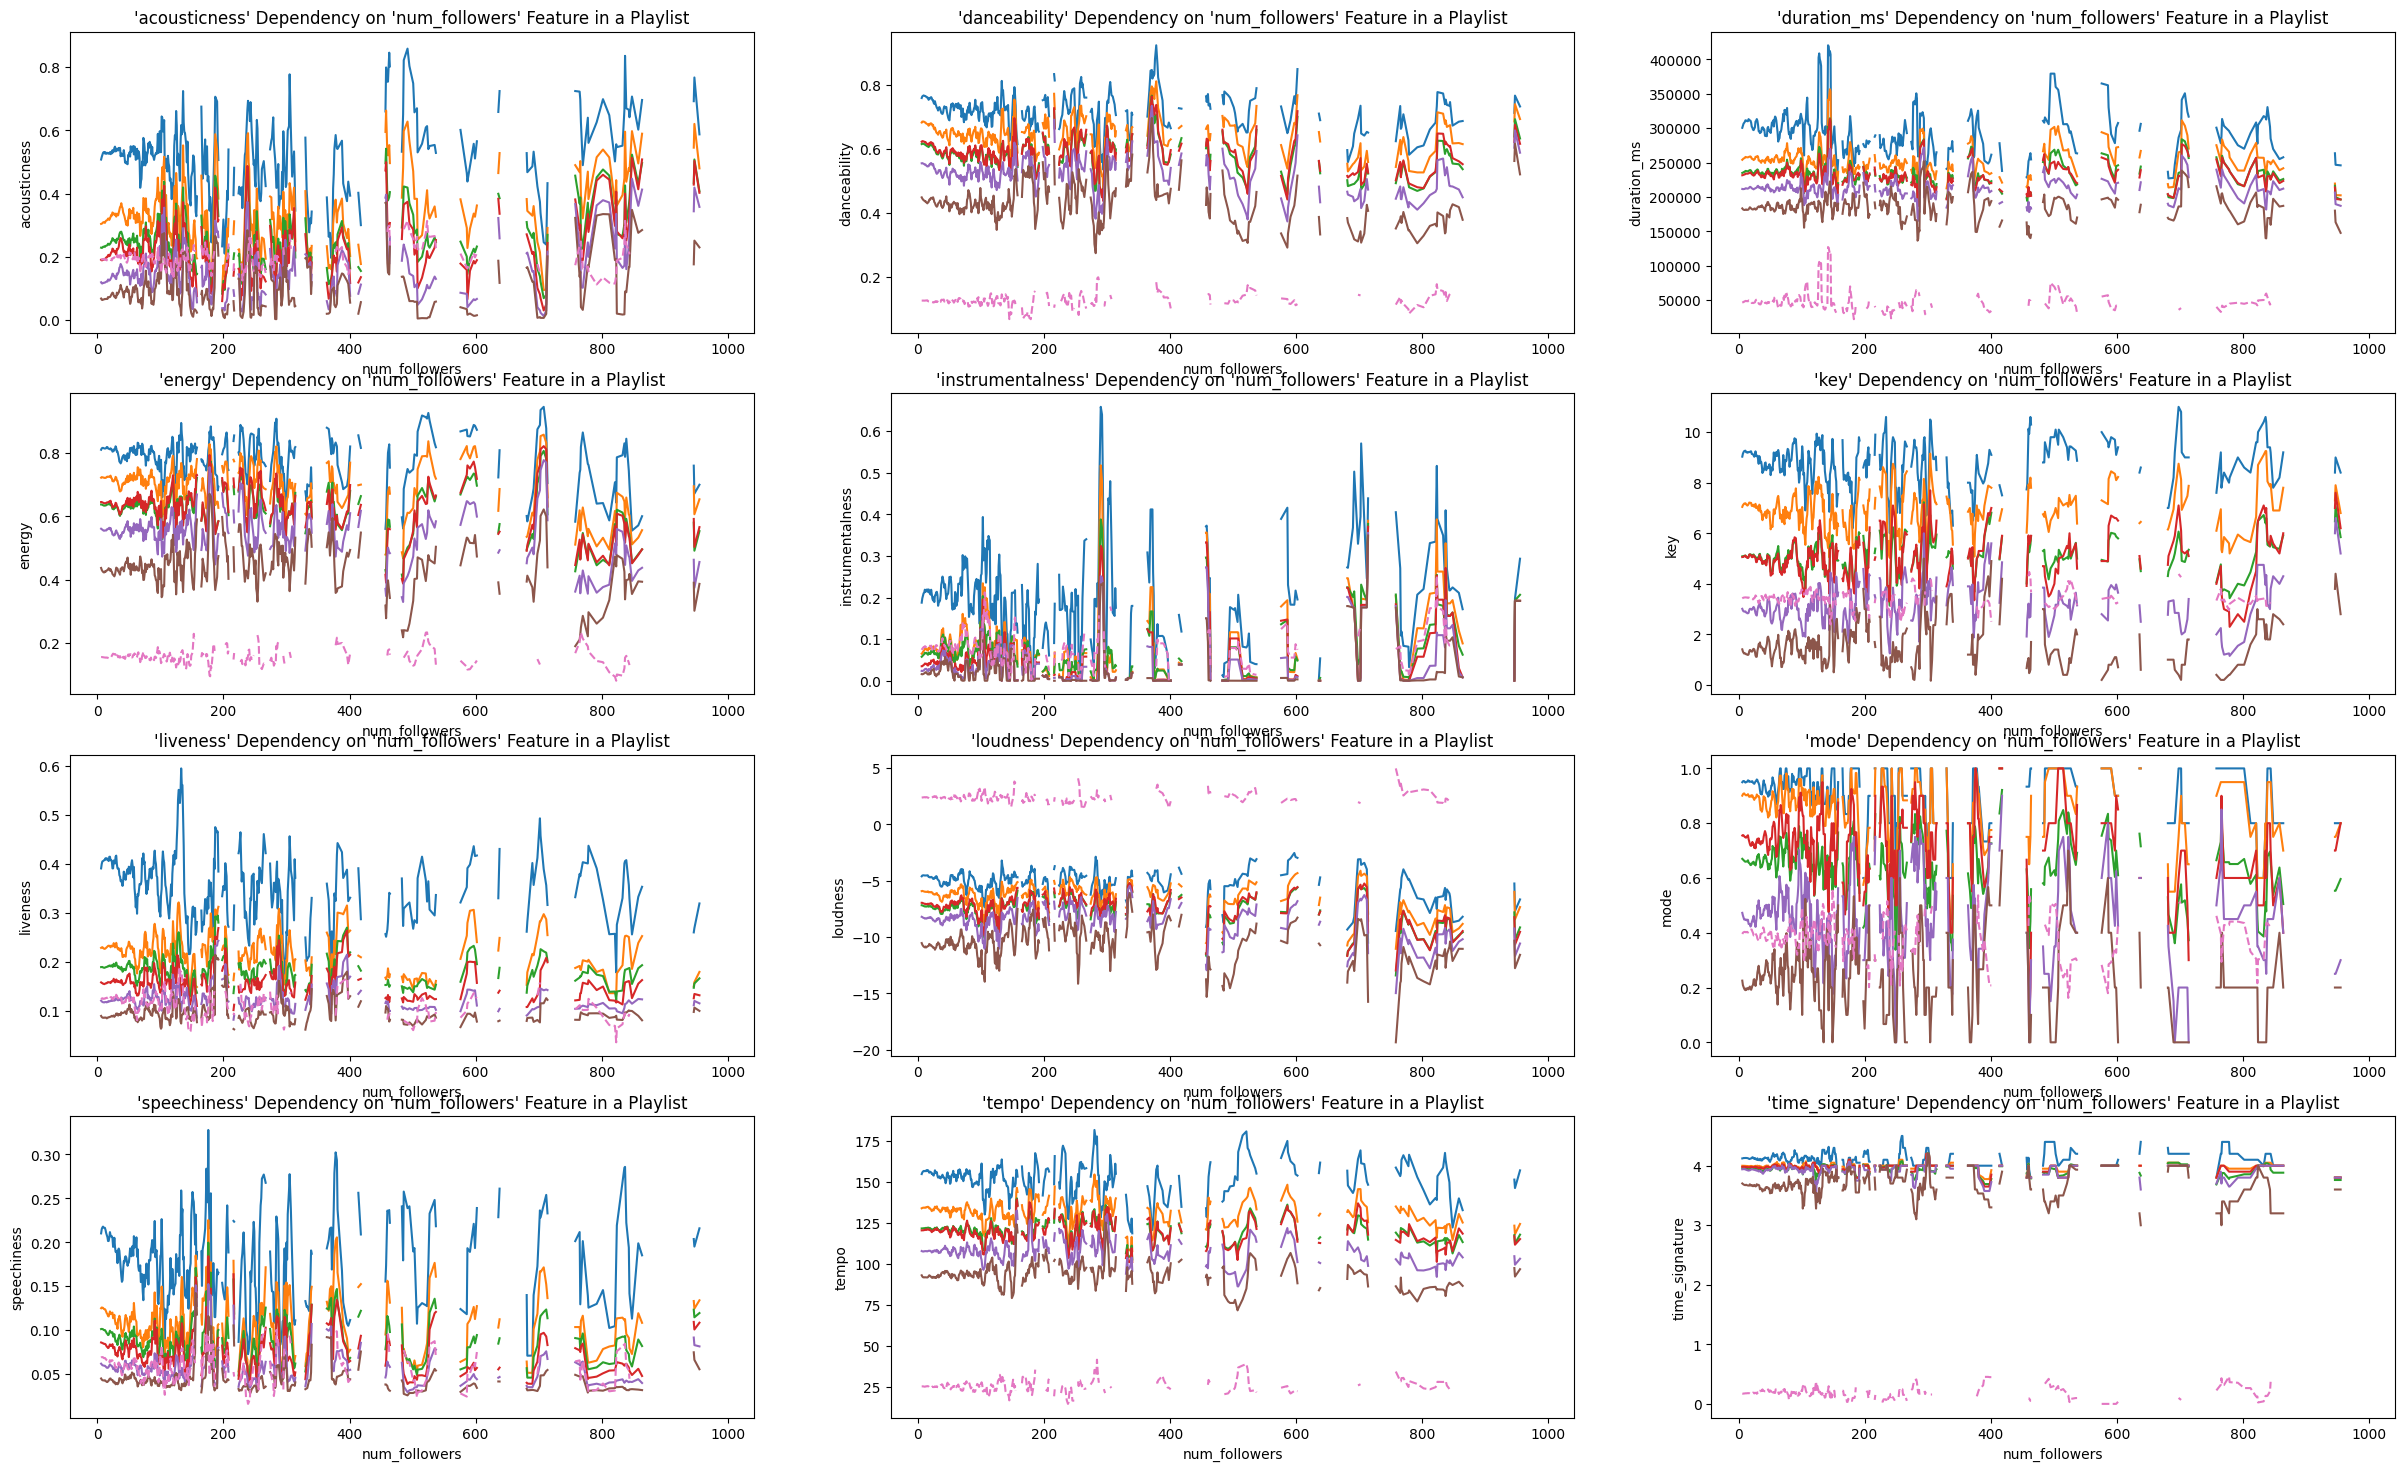

In [11]:
plot_dependency_table("num_followers", rolling_period = 5, max_value = 1000)

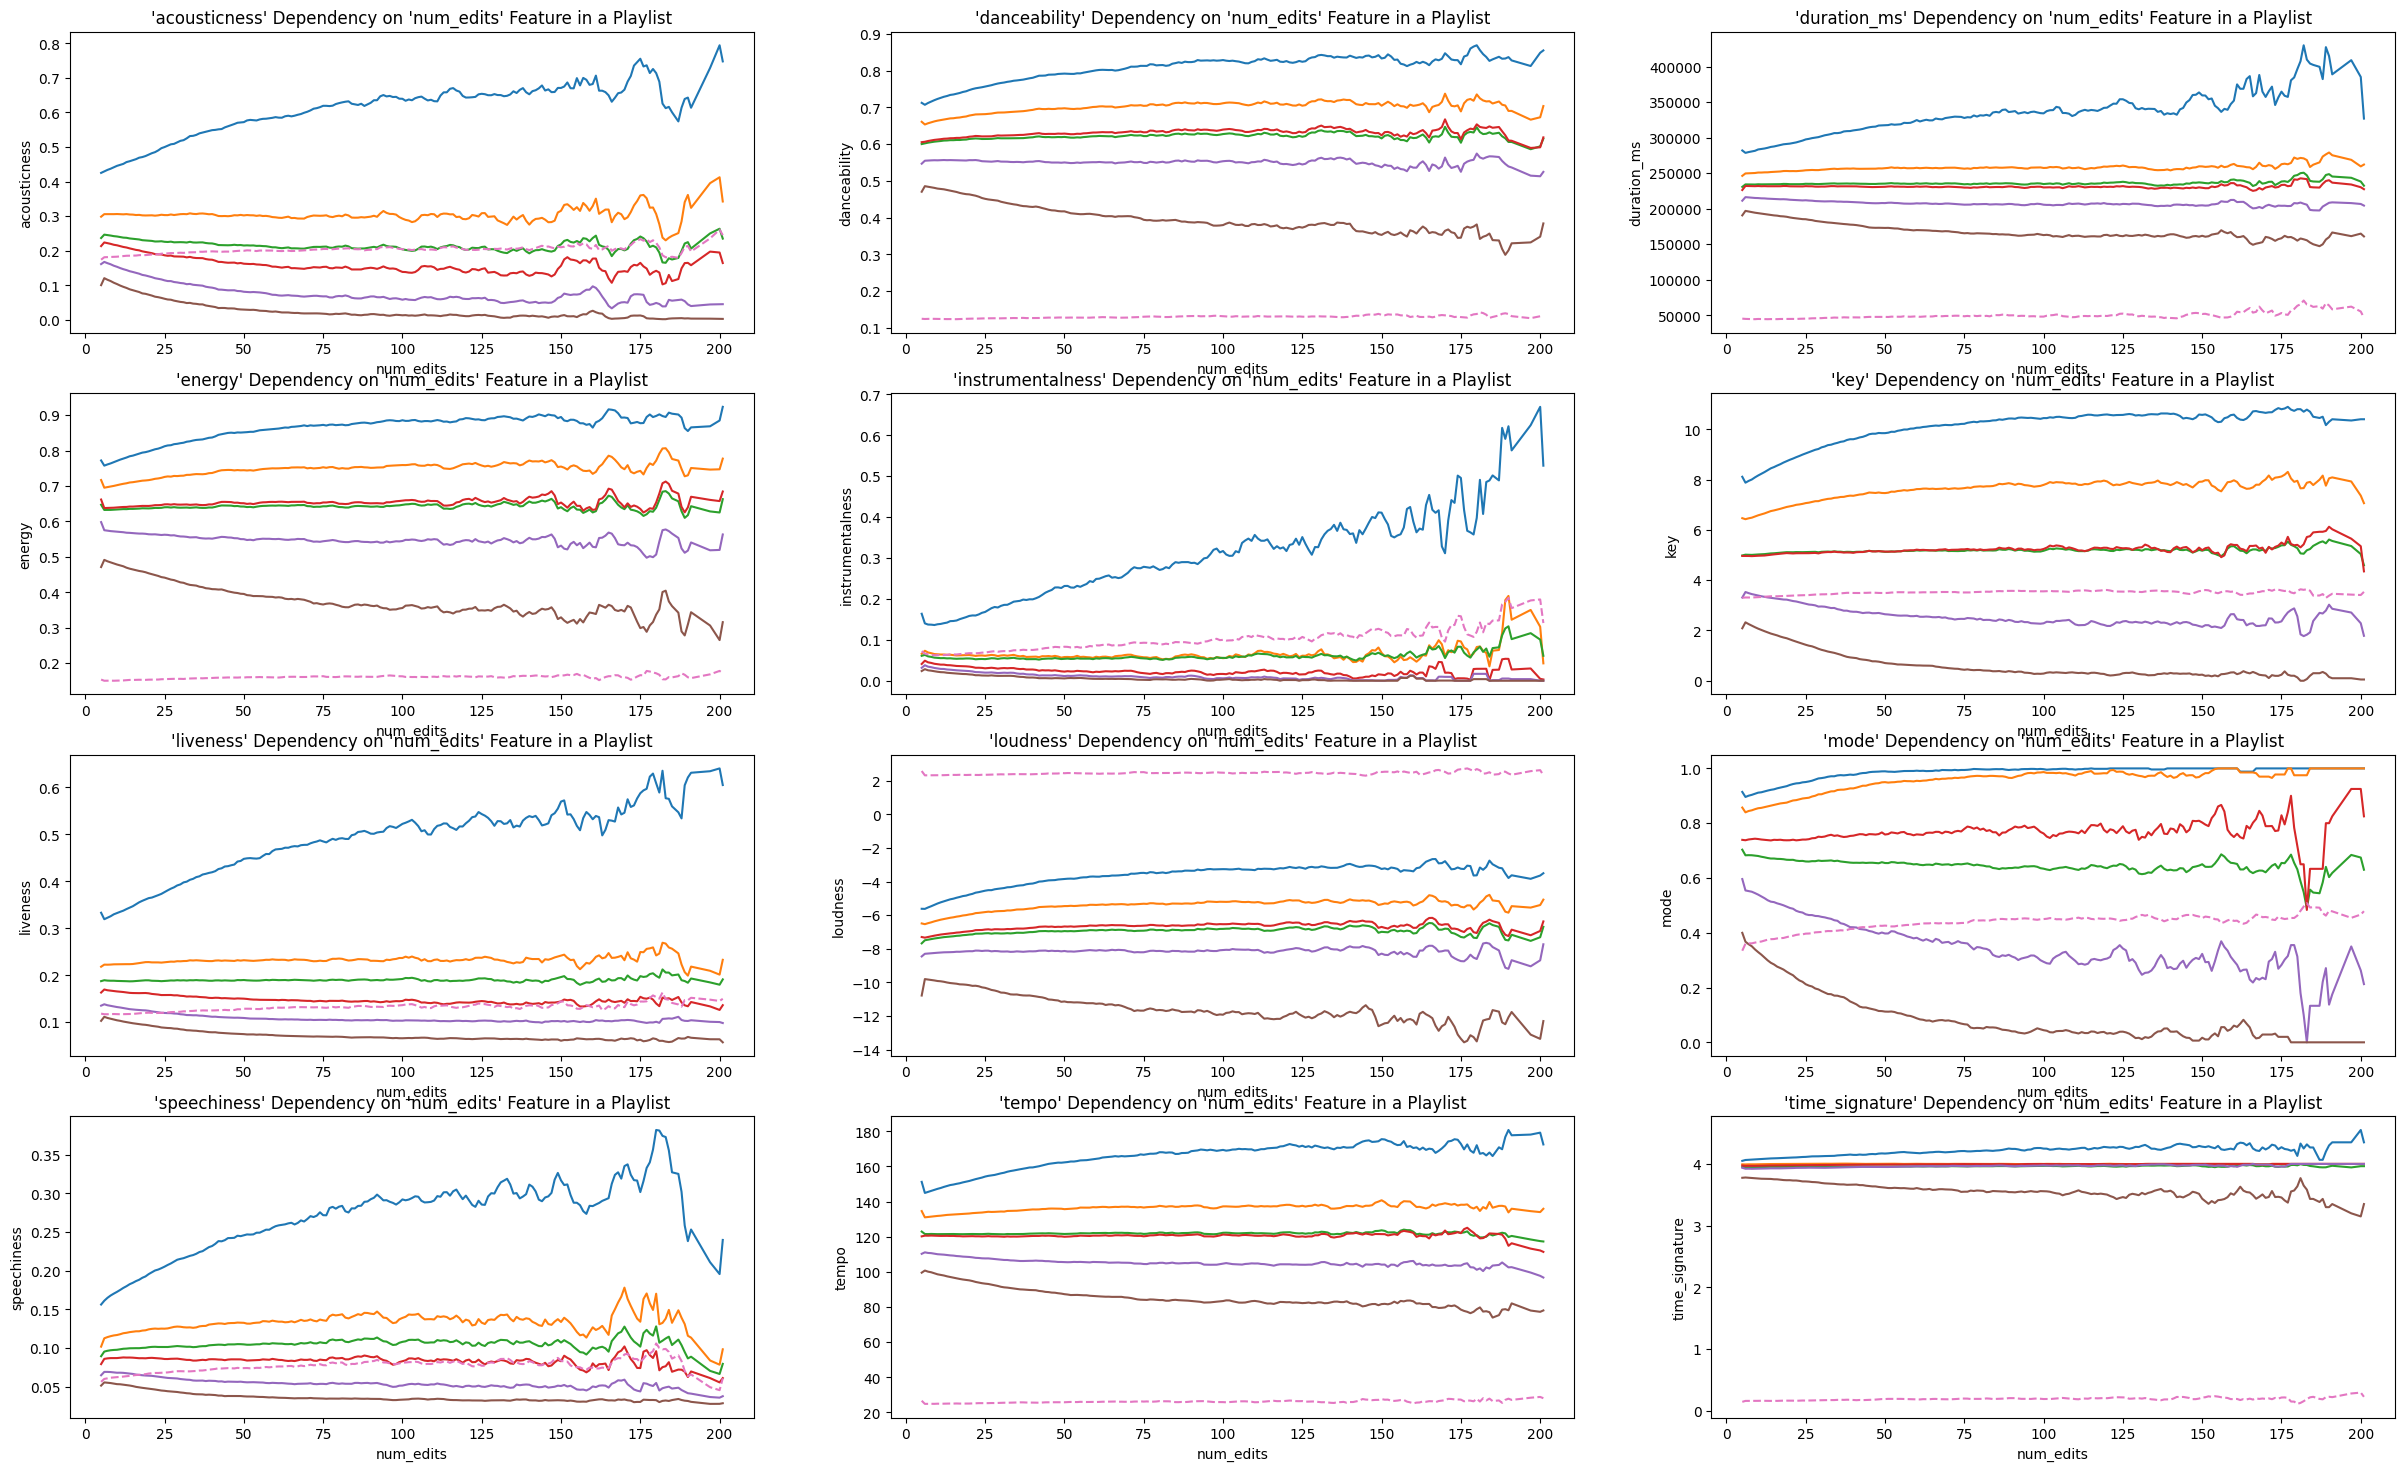

In [12]:
plot_dependency_table("num_edits", rolling_period = 5)

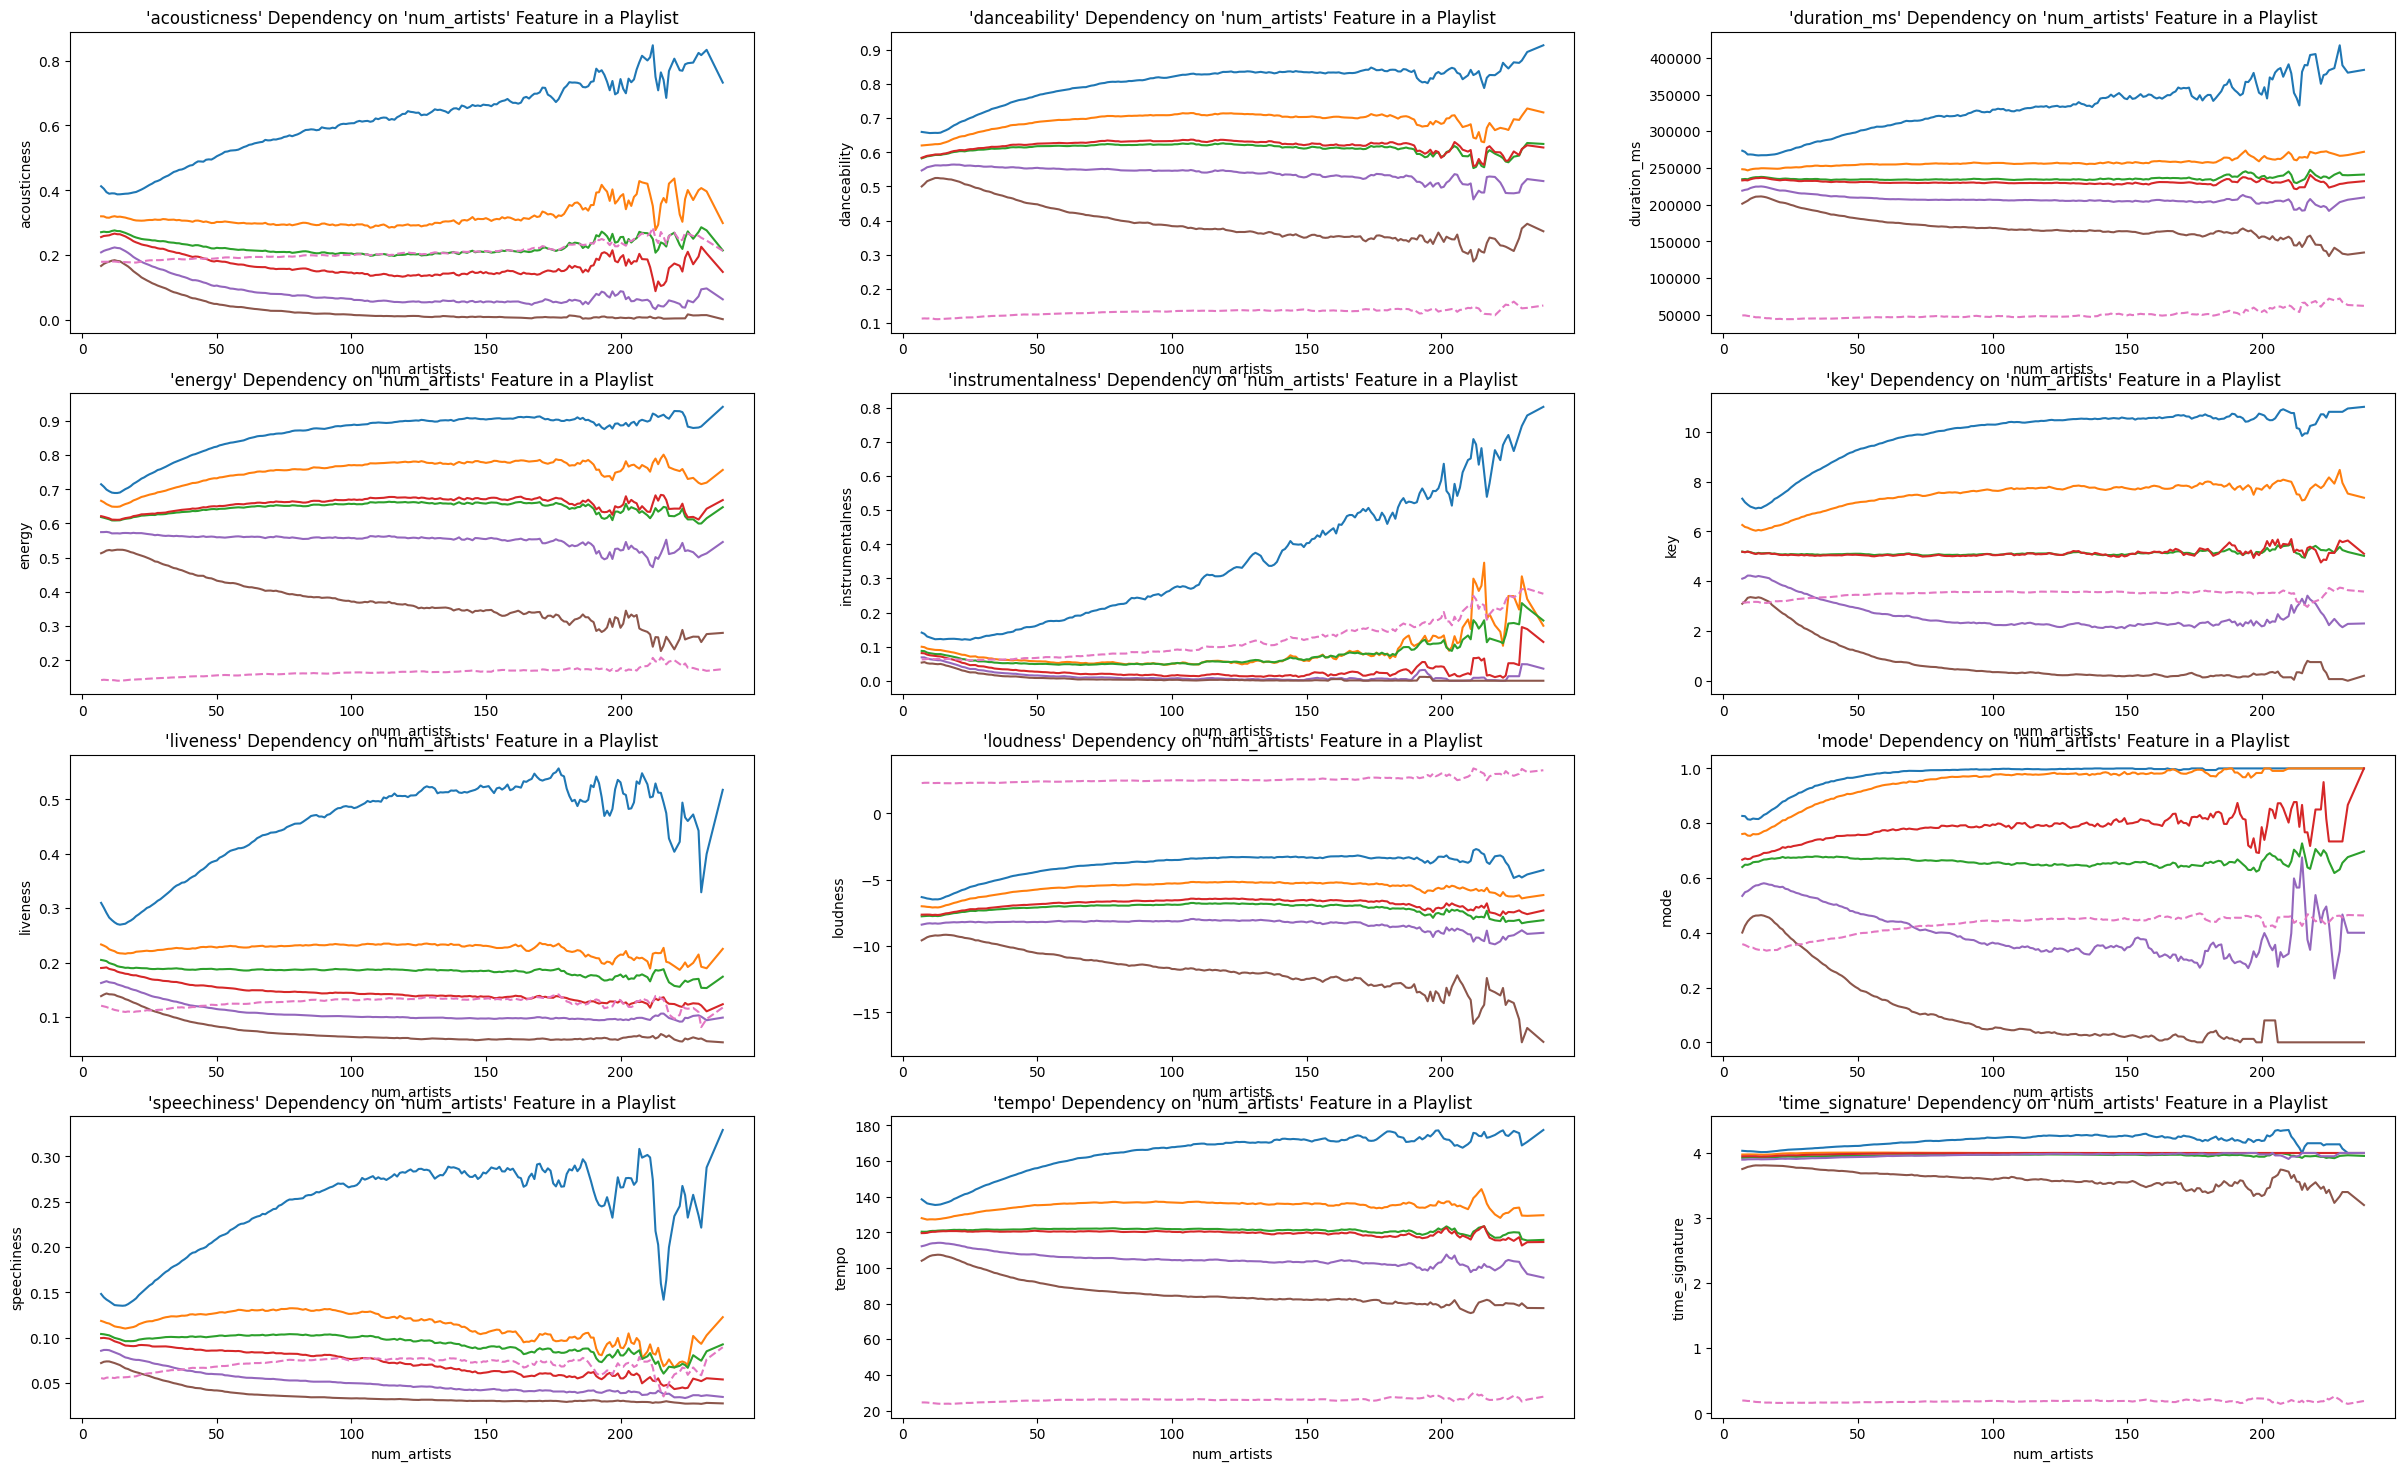

In [13]:
plot_dependency_table("num_artists", rolling_period = 5)